In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rapidfuzz import process
import pickle
from rich.console import Console
from rich.table import Table
import numpy as np
from scipy import stats
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

In [82]:
# Recuperar el mismo DataFrame
with open('dfp_guardado.pkl', 'rb') as p:
    dfp = pickle.load(p)
dfe = dfp.copy()

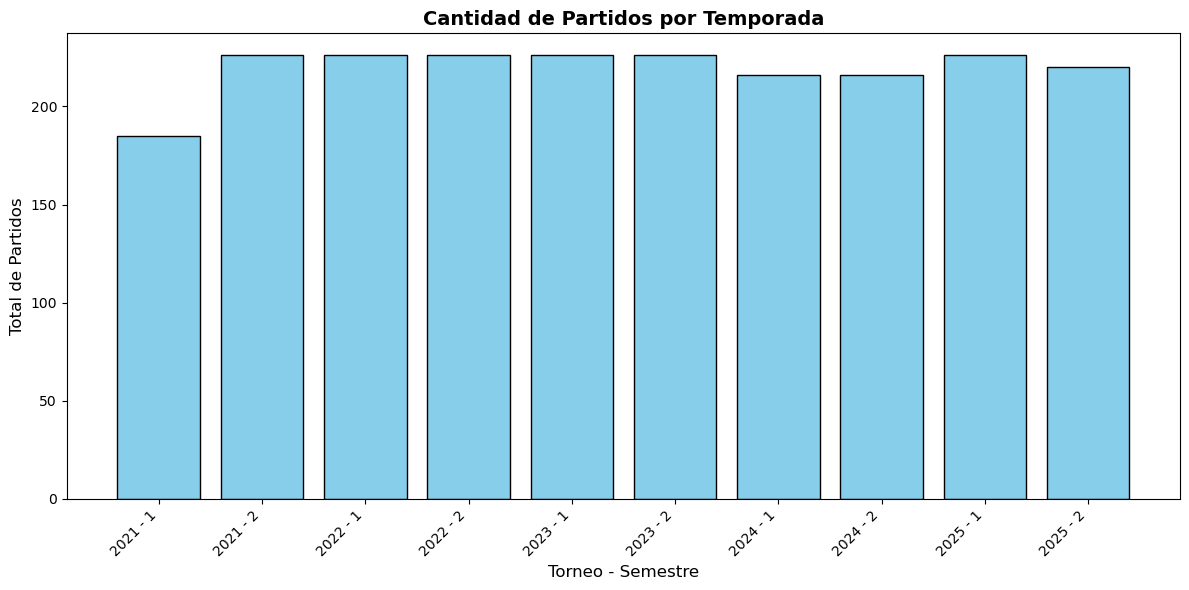

In [83]:
# Agrupar por torneo y semestre, contar partidos
partidos_por_temporada = dfe.groupby(["torneo", "semestre"]).size().reset_index(name="Total Partidos")

# Crear columna combinada para mostrar en el eje X (asegurando str)
partidos_por_temporada["Temporada"] = partidos_por_temporada["torneo"].astype(str) + " - " + partidos_por_temporada["semestre"].astype(str)

# Graficar en barras
plt.figure(figsize=(12,6))
plt.bar(partidos_por_temporada["Temporada"], partidos_por_temporada["Total Partidos"], 
        color="skyblue", edgecolor="black")

# Personalización del gráfico
plt.title("Cantidad de Partidos por Temporada", fontsize=14, weight="bold")
plt.xlabel("Torneo - Semestre", fontsize=12)
plt.ylabel("Total de Partidos", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

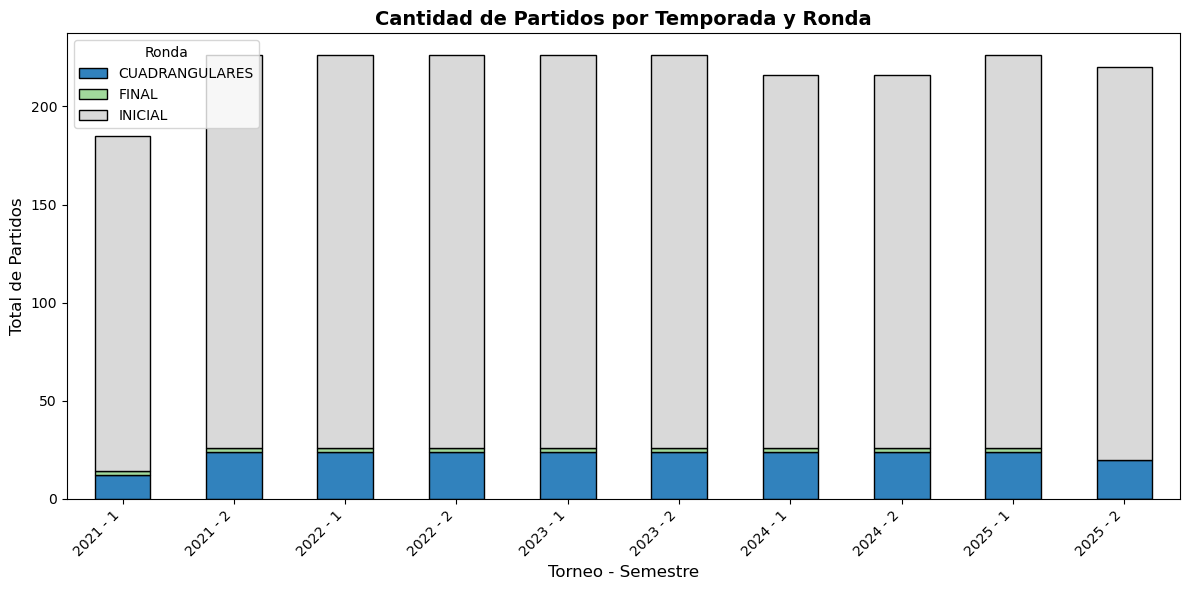

In [84]:
# Agrupar por torneo, semestre y ronda
partidos_por_temporada_ronda = (
    dfe.groupby(["torneo", "semestre", "ronda"])
    .size()
    .reset_index(name="Total Partidos")
)

# Crear una columna combinada de temporada (torneo + semestre)
partidos_por_temporada_ronda["Temporada"] = (
    partidos_por_temporada_ronda["torneo"].astype(str)
    + " - "
    + partidos_por_temporada_ronda["semestre"].astype(str)
)

# Pivotear para que cada ronda sea una columna
pivot = partidos_por_temporada_ronda.pivot_table(
    index="Temporada", 
    columns="ronda", 
    values="Total Partidos", 
    fill_value=0
)

# Graficar en barras apiladas
pivot.plot(kind="bar", stacked=True, figsize=(12,6), colormap="tab20c", edgecolor="black")

# Personalización
plt.title("Cantidad de Partidos por Temporada y Ronda", fontsize=14, weight="bold")
plt.xlabel("Torneo - Semestre", fontsize=12)
plt.ylabel("Total de Partidos", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Ronda")
plt.tight_layout()
plt.show()

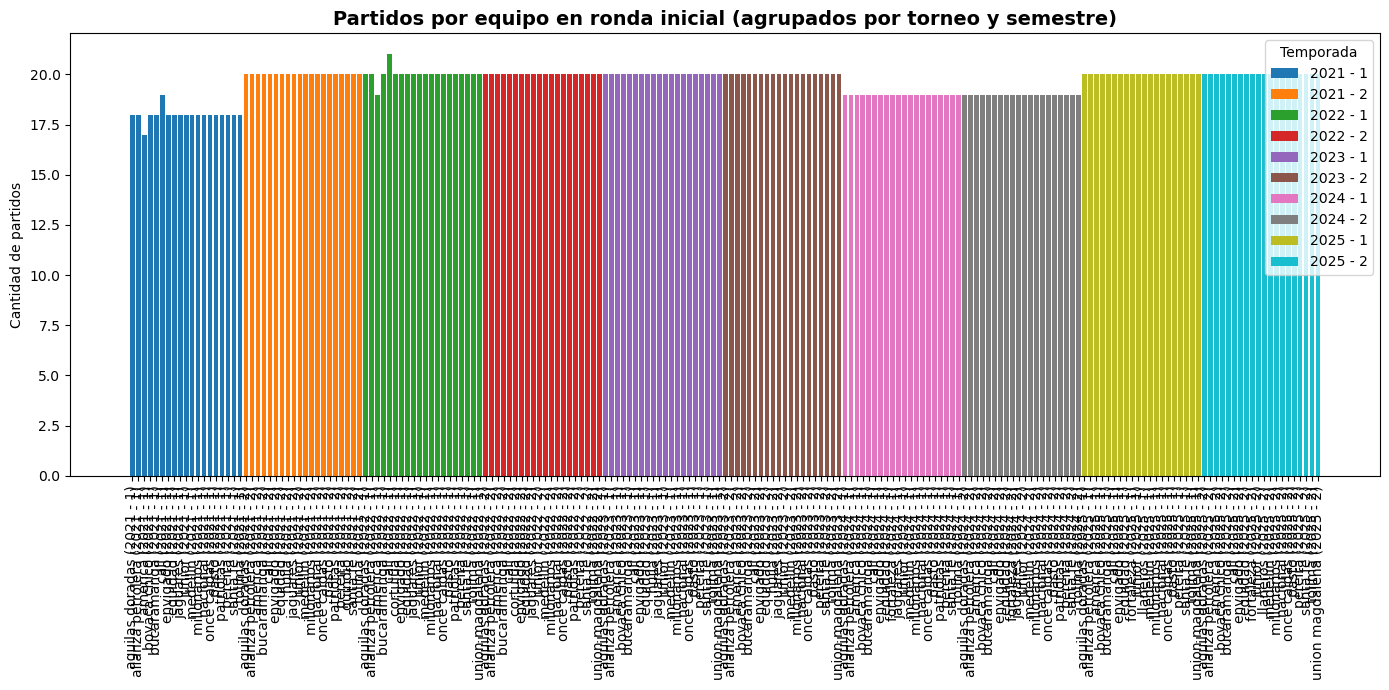

In [85]:
# Filtrar solo la ronda inicial
dfe_inicial = dfe[dfe["ronda"].str.lower() == "inicial"]

# Unificar equipos locales y visitantes en una sola columna
dfe_local = dfe_inicial[["torneo", "semestre", "equipo_local"]].rename(columns={"equipo_local": "equipo"})
dfe_visitante = dfe_inicial[["torneo", "semestre", "equipo_visitante"]].rename(columns={"equipo_visitante": "equipo"})

# Concatenar ambos
dfe_todos = pd.concat([dfe_local, dfe_visitante])

# Contar partidos por torneo, semestre y equipo
partidos_equipo = dfe_todos.groupby(["torneo", "semestre", "equipo"]).size().reset_index(name="Partidos")

# Crear columna temporada combinada
partidos_equipo["Temporada"] = partidos_equipo["torneo"].astype(str) + " - " + partidos_equipo["semestre"].astype(str)

# Graficar
plt.figure(figsize=(14,7))
for temporada in partidos_equipo["Temporada"].unique():
    subset = partidos_equipo[partidos_equipo["Temporada"] == temporada]
    plt.bar(subset["equipo"] + " (" + temporada + ")", subset["Partidos"], label=temporada)

plt.title("Partidos por equipo en ronda inicial (agrupados por torneo y semestre)", fontsize=14, weight="bold")
plt.ylabel("Cantidad de partidos")
plt.xticks(rotation=90)
plt.legend(title="Temporada")
plt.tight_layout()
plt.show()



Partidos por equipo en temporada 2021-1, ronda inicial:
               Equipo  Partidos
0                cali        19
1              junior        18
2         millonarios        18
3               pasto        18
4            nacional        18
5              tolima        18
6         bucaramanga        18
7   alianza petrolera        18
8           patriotas        18
9            medellin        18
10           envigado        18
11           jaguares        18
12            pereira        18
13            equidad        18
14        once caldas        18
15           santa fe        18
16       boyaca chico        18
17    aguilas doradas        18
18            america        17


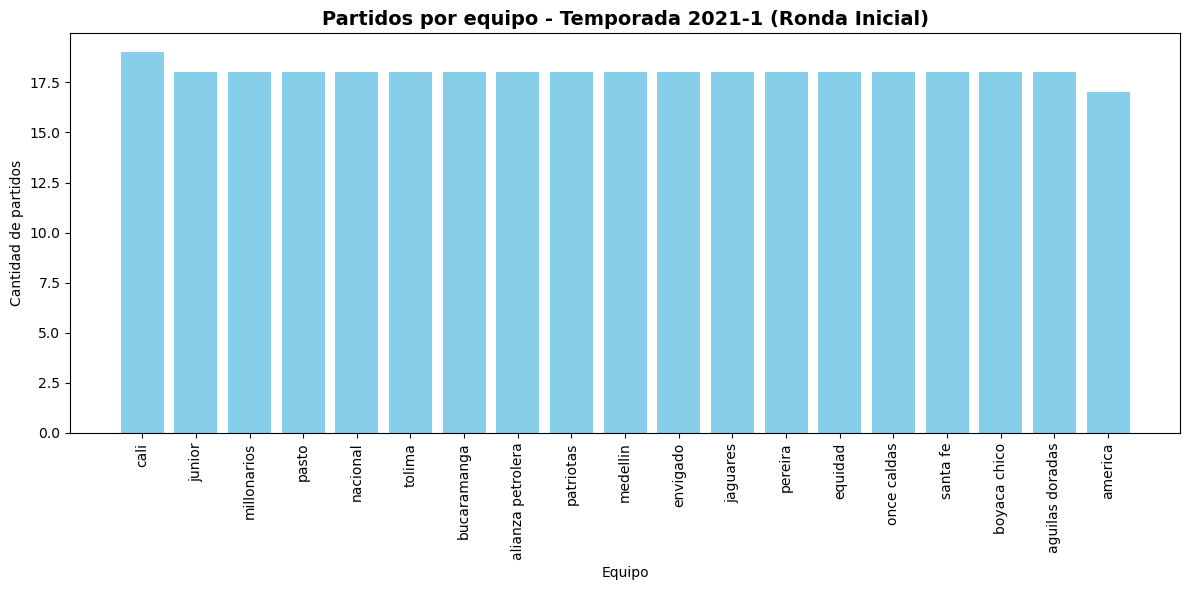

In [86]:
# Filtrar temporada 2021-1 y ronda inicial
dfe_filtrado = dfe[
    (dfe["torneo"].astype(str) == "2021") & 
    (dfe["semestre"].astype(str) == "1") & 
    (dfe["ronda"].str.lower() == "inicial")
]

# Unificar equipos locales y visitantes en una sola columna
dfe_local = dfe_filtrado[["equipo_local"]].rename(columns={"equipo_local": "equipo"})
dfe_visitante = dfe_filtrado[["equipo_visitante"]].rename(columns={"equipo_visitante": "equipo"})

# Concatenar ambos
dfe_todos = pd.concat([dfe_local, dfe_visitante])

# Contar partidos por equipo
partidos_equipo = dfe_todos["equipo"].value_counts().reset_index()
partidos_equipo.columns = ["Equipo", "Partidos"]

# Mostrar tabla (opcional)
print("Partidos por equipo en temporada 2021-1, ronda inicial:")
print(partidos_equipo)

# Graficar en barras
plt.figure(figsize=(12,6))
plt.bar(partidos_equipo["Equipo"], partidos_equipo["Partidos"], color="skyblue")
plt.title("Partidos por equipo - Temporada 2021-1 (Ronda Inicial)", fontsize=14, weight="bold")
plt.xlabel("Equipo")
plt.ylabel("Cantidad de partidos")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


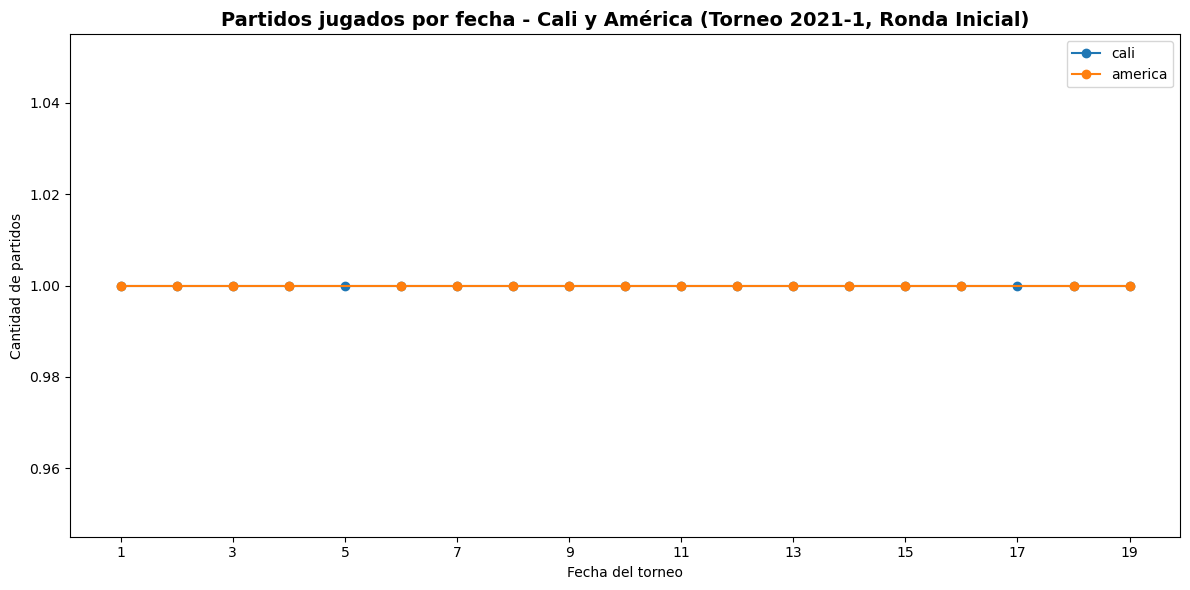

In [87]:
# Filtrar torneo 2021, semestre 1 y ronda inicial
dfe_filtrado = dfe[
    (dfe["torneo"].astype(str) == "2021") &
    (dfe["semestre"].astype(str) == "1") &
    (dfe["ronda"].str.lower() == "inicial")
]

# Equipos de interés
equipos_interes = ["cali", "america"]

# Seleccionar equipos de interés (locales y visitantes)
dfe_local = dfe_filtrado[dfe_filtrado["equipo_local"].isin(equipos_interes)][["fecha_torneo", "equipo_local"]].rename(columns={"equipo_local": "equipo"})
dfe_visitante = dfe_filtrado[dfe_filtrado["equipo_visitante"].isin(equipos_interes)][["fecha_torneo", "equipo_visitante"]].rename(columns={"equipo_visitante": "equipo"})

# Unir ambos
dfe_todos = pd.concat([dfe_local, dfe_visitante])

# Contar partidos por equipo y fecha
partidos_fecha = dfe_todos.groupby(["fecha_torneo", "equipo"]).size().reset_index(name="Partidos")

plt.figure(figsize=(12,6))
for equipo in equipos_interes:
    subset = partidos_fecha[partidos_fecha["equipo"] == equipo]
    plt.plot(subset["fecha_torneo"], subset["Partidos"], marker="o", label=equipo)

plt.title("Partidos jugados por fecha - Cali y América (Torneo 2021-1, Ronda Inicial)", fontsize=14, weight="bold")
plt.xlabel("Fecha del torneo")
plt.ylabel("Cantidad de partidos")

# 🔹 Eje X con saltos de 2 en 2
min_x = int(partidos_fecha["fecha_torneo"].min())
max_x = int(partidos_fecha["fecha_torneo"].max())
plt.xticks(range(min_x, max_x + 1, 2))

plt.legend()
plt.tight_layout()
plt.show()

In [88]:
# Filtro para identificar el registro que deseas cambiar
condicion = (
    (dfe["torneo"].astype(int) == 2021) &
    (dfe["semestre"].astype(int) == 1) &
    (dfe["fecha_torneo"].astype(int) == 17) &
    (dfe["ronda"].str.lower() == "inicial") &
    (dfe["equipo_local"].str.lower() == "cali")
)

# Verificar antes del cambio
print("Antes del cambio:")
print(dfe.loc[condicion, ["torneo", "semestre", "fecha_torneo", "equipo_local"]])

# Realizar el cambio
dfe.loc[condicion, "equipo_local"] = "america"

# Confirmar el cambio
print("\nDespués del cambio:")
print(dfe.loc[condicion, ["torneo", "semestre", "fecha_torneo", "equipo_local"]])

Antes del cambio:
     torneo  semestre  fecha_torneo equipo_local
146    2021         1            17         cali

Después del cambio:
     torneo  semestre  fecha_torneo equipo_local
146    2021         1            17      america


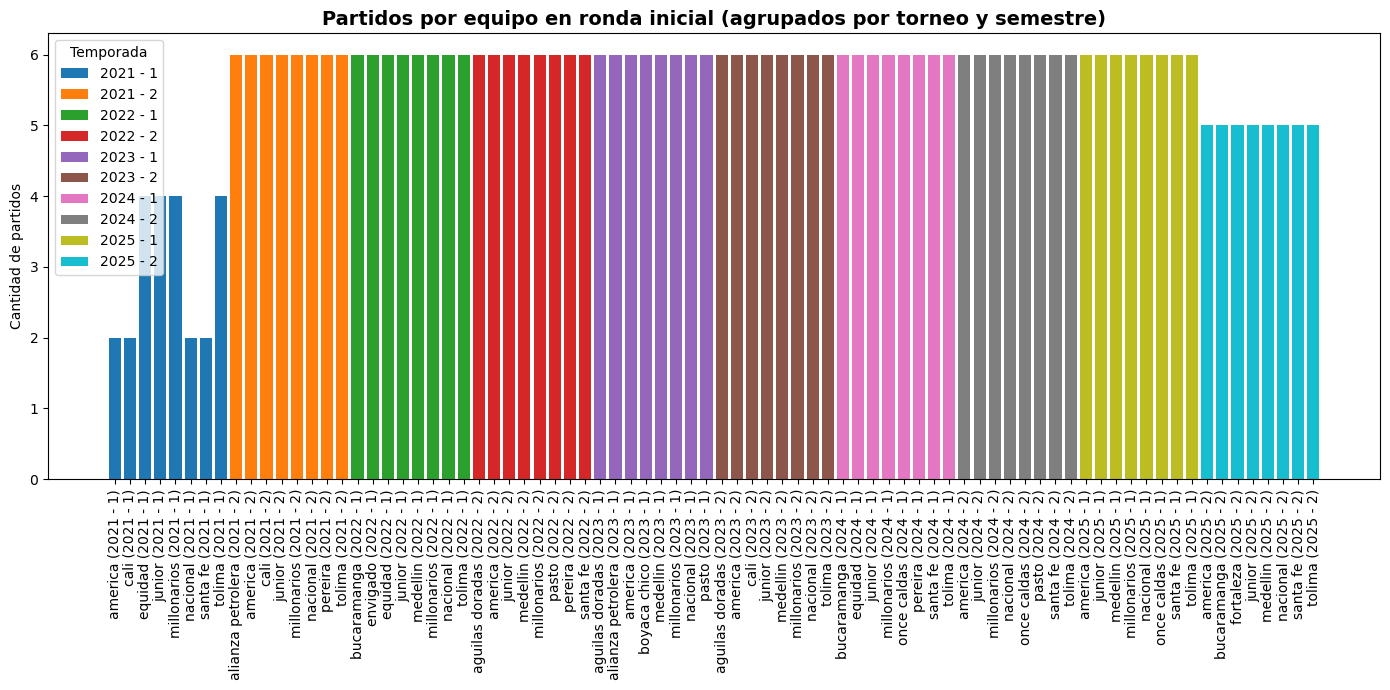

In [89]:
# Filtrar solo la ronda inicial
dfe_inicial = dfe[dfe["ronda"].str.lower() == "cuadrangulares"]

# Unificar equipos locales y visitantes en una sola columna
dfe_local = dfe_inicial[["torneo", "semestre", "equipo_local"]].rename(columns={"equipo_local": "equipo"})
dfe_visitante = dfe_inicial[["torneo", "semestre", "equipo_visitante"]].rename(columns={"equipo_visitante": "equipo"})

# Concatenar ambos
dfe_todos = pd.concat([dfe_local, dfe_visitante])

# Contar partidos por torneo, semestre y equipo
partidos_equipo = dfe_todos.groupby(["torneo", "semestre", "equipo"]).size().reset_index(name="Partidos")

# Crear columna temporada combinada
partidos_equipo["Temporada"] = partidos_equipo["torneo"].astype(str) + " - " + partidos_equipo["semestre"].astype(str)

# Graficar
plt.figure(figsize=(14,7))
for temporada in partidos_equipo["Temporada"].unique():
    subset = partidos_equipo[partidos_equipo["Temporada"] == temporada]
    plt.bar(subset["equipo"] + " (" + temporada + ")", subset["Partidos"], label=temporada)

plt.title("Partidos por equipo en ronda inicial (agrupados por torneo y semestre)", fontsize=14, weight="bold")
plt.ylabel("Cantidad de partidos")
plt.xticks(rotation=90)
plt.legend(title="Temporada")
plt.tight_layout()
plt.show()


In [90]:
# Filtro para identificar el registro que deseas cambiar
condicion = (
    (dfe["torneo"].astype(int) == 2023) &
    (dfe["semestre"].astype(int) == 2) &
    (dfe["fecha_torneo"].astype(int) == 1) &
    (dfe["ronda"].str.lower() == "cuadrangulares") &
    (dfe["equipo_local"].str.lower() == "nacional") &
    (dfe["equipo_visitante"].str.lower() == "cali")
)

# Verificar antes del cambio
print("Antes del cambio:")
print(dfe.loc[condicion, ["torneo", "semestre", "fecha_torneo", "equipo_visitante"]])

# Realizar el cambio
dfe.loc[condicion, "equipo_visitante"] = "america"

# Confirmar el cambio
print("\nDespués del cambio:")
print(dfe.loc[condicion, ["torneo", "semestre", "fecha_torneo", "equipo_visitante"]])

Antes del cambio:
Empty DataFrame
Columns: [torneo, semestre, fecha_torneo, equipo_visitante]
Index: []

Después del cambio:
Empty DataFrame
Columns: [torneo, semestre, fecha_torneo, equipo_visitante]
Index: []


 **Análisis de la columna 'goles_local':**
- Promedio: 1.31
- Mediana: 1.00
- Desviación estándar: 1.10
- Rango intercuartílico (IQR): 2.00
- Límite inferior: -3.00, superior: 5.00
- Outliers detectados (IQR): 4 registros
- Outliers detectados (Z-score): 18 registros

 La variable 'goles_local' tiene varios valores atípicos. Esto podría indicar partidos con resultados anómalos o errores en los datos.

 **Análisis de la columna 'goles_visitante':**
- Promedio: 0.94
- Mediana: 1.00
- Desviación estándar: 0.98
- Rango intercuartílico (IQR): 1.00
- Límite inferior: -1.50, superior: 2.50
- Outliers detectados (IQR): 146 registros
- Outliers detectados (Z-score): 41 registros

 La variable 'goles_visitante' tiene varios valores atípicos. Esto podría indicar partidos con resultados anómalos o errores en los datos.



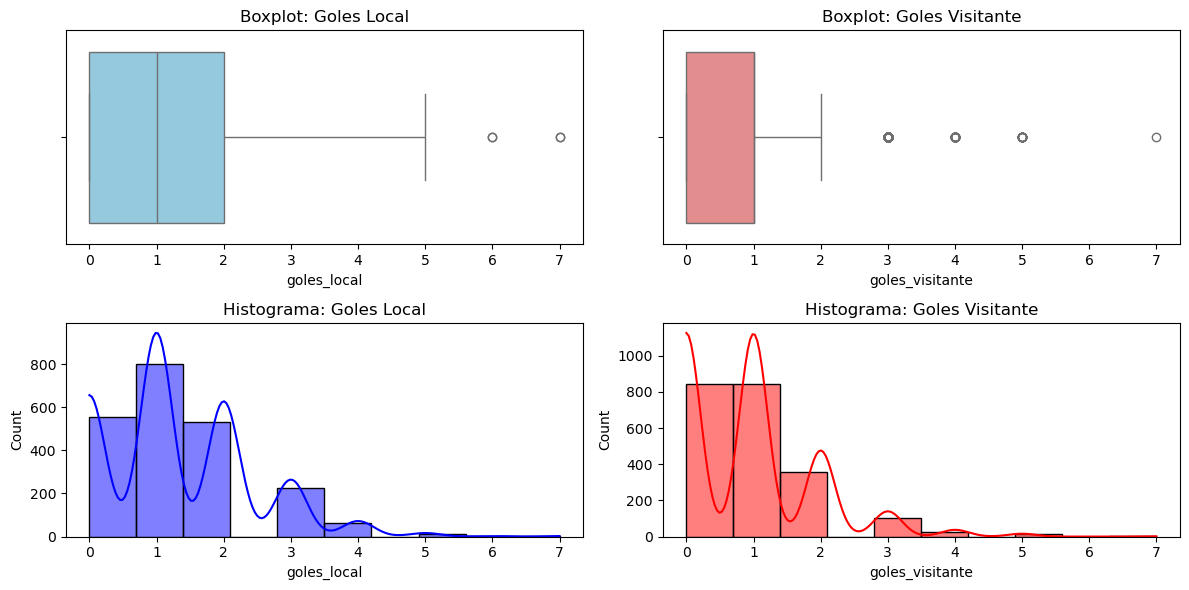

In [91]:
# Función para detectar outliers (IQR)
def detectar_outliers_iqr(data, columna):
    Q1 = data[columna].quantile(0.25)
    Q3 = data[columna].quantile(0.75)
    IQR = Q3 - Q1
    li = Q1 - 1.5 * IQR
    ls = Q3 + 1.5 * IQR
    outliers = data[(data[columna] < li) | (data[columna] > ls)]
    return outliers, li, ls

# Función de análisis e interpretación automática
def interpretar_columna(data, columna):
    outliers_iqr, li, ls = detectar_outliers_iqr(data, columna)
    z_scores = np.abs(stats.zscore(data[columna]))
    outliers_z = data[z_scores > 3]
    
    desc = data[columna].describe()
    texto = f" **Análisis de la columna '{columna}':**\n"
    texto += f"- Promedio: {desc['mean']:.2f}\n"
    texto += f"- Mediana: {desc['50%']:.2f}\n"
    texto += f"- Desviación estándar: {desc['std']:.2f}\n"
    texto += f"- Rango intercuartílico (IQR): {desc['75%'] - desc['25%']:.2f}\n"
    texto += f"- Límite inferior: {li:.2f}, superior: {ls:.2f}\n"
    texto += f"- Outliers detectados (IQR): {len(outliers_iqr)} registros\n"
    texto += f"- Outliers detectados (Z-score): {len(outliers_z)} registros\n\n"

    # Interpretación automática
    if len(outliers_iqr) == 0 and len(outliers_z) == 0:
        texto += f" La variable '{columna}' presenta una distribución controlada, sin valores atípicos relevantes.\n"
    elif len(outliers_iqr) <= 2:
        texto += f" Se observan pocos valores atípicos en '{columna}', posiblemente debidos a partidos con resultados poco comunes.\n"
    else:
        texto += f" La variable '{columna}' tiene varios valores atípicos. Esto podría indicar partidos con resultados anómalos o errores en los datos.\n"
    return texto, outliers_iqr

# Análisis general
reportes = []
for col in ['goles_local', 'goles_visitante']:
    texto, outliers = interpretar_columna(dfe, col)
    reportes.append(texto)
    print(texto)

# Visualizaciones EDA
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
sns.boxplot(x=dfe['goles_local'], color='skyblue')
plt.title('Boxplot: Goles Local')

plt.subplot(2,2,2)
sns.boxplot(x=dfe['goles_visitante'], color='lightcoral')
plt.title('Boxplot: Goles Visitante')

plt.subplot(2,2,3)
sns.histplot(dfe['goles_local'], bins=10, kde=True, color='blue')
plt.title('Histograma: Goles Local')

plt.subplot(2,2,4)
sns.histplot(dfe['goles_visitante'], bins=10, kde=True, color='red')
plt.title('Histograma: Goles Visitante')

plt.tight_layout()
plt.show()


In [92]:
# Filtro para identificar el registro que deseas cambiar
condicion = (
    (dfe["torneo"].astype(int) == 2025) &
    (dfe["semestre"].astype(int) == 1) &
    (dfe["fecha_torneo"].astype(int) == 4) &
    (dfe["ronda"].str.lower() == "inicial") &
    (dfe["equipo_local"].str.lower() == "llaneras") &
    (dfe["equipo_visitante"].str.lower() == "millonarios")
)

In [93]:
# Verificar antes del cambio
print("Antes del cambio:")
print(dfe.loc[condicion, ["torneo", "semestre", "fecha_torneo", "equipo_visitante"]])

# Realizar el cambio
dfe.loc[condicion, "equipo_local"] = "llaneros"

# Confirmar el cambio
print("\nDespués del cambio:")
print(dfe.loc[condicion, ["torneo", "semestre", "fecha_torneo", "equipo_local"]])

Antes del cambio:
Empty DataFrame
Columns: [torneo, semestre, fecha_torneo, equipo_visitante]
Index: []

Después del cambio:
Empty DataFrame
Columns: [torneo, semestre, fecha_torneo, equipo_local]
Index: []


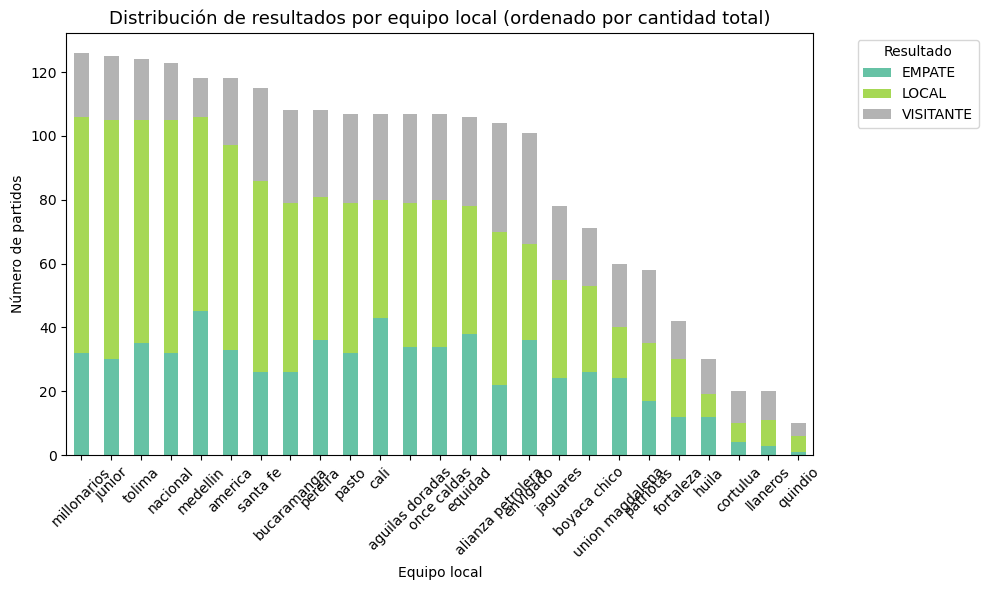

In [94]:
# Agrupar por equipo local y resultado
conteo = dfe.groupby(['equipo_local', 'resultado']).size().reset_index(name='cantidad')

# Calcular el total de partidos por equipo para ordenar
totales = conteo.groupby('equipo_local')['cantidad'].sum().sort_values(ascending=False)
orden_equipos = totales.index

# Reordenar el DataFrame según ese orden
conteo['equipo_local'] = pd.Categorical(conteo['equipo_local'], categories=orden_equipos, ordered=True)
conteo = conteo.sort_values(['equipo_local', 'resultado'])

# Crear gráfico de barras apiladas ordenado
pivot_cant = conteo.pivot(index='equipo_local', columns='resultado', values='cantidad').fillna(0)
pivot_cant = pivot_cant.loc[orden_equipos]  # Asegurar el orden correcto

pivot_cant.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    colormap='Set2'
)

plt.title("Distribución de resultados por equipo local (ordenado por cantidad total)", fontsize=13)
plt.ylabel("Número de partidos")
plt.xlabel("Equipo local")
plt.xticks(rotation=45)
plt.legend(title="Resultado", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


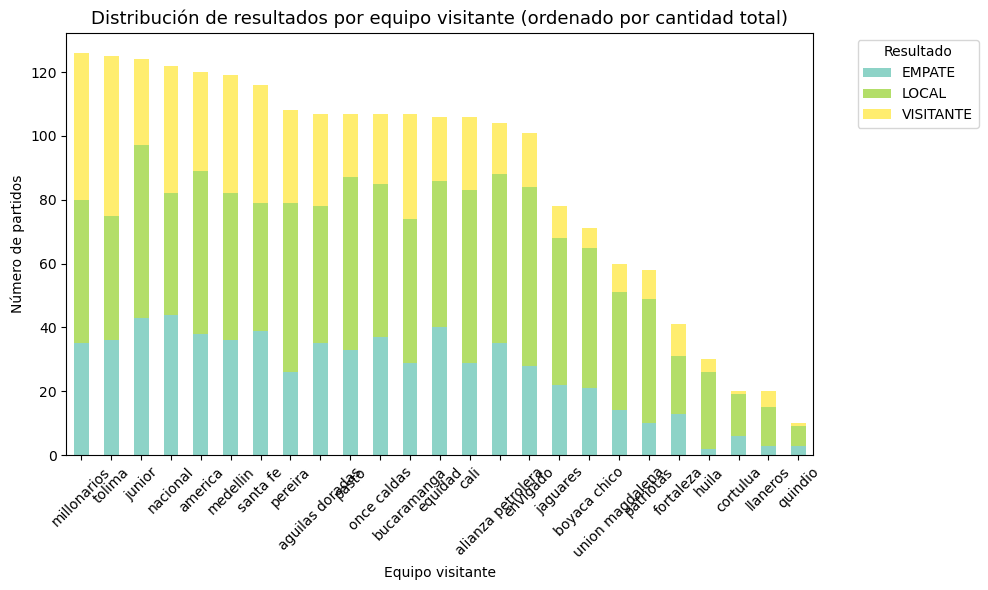

In [95]:
# Agrupar por equipo visitante y resultado
conteo = dfe.groupby(['equipo_visitante', 'resultado']).size().reset_index(name='cantidad')

# Calcular el total de partidos por equipo visitante (para ordenar)
totales = conteo.groupby('equipo_visitante')['cantidad'].sum().sort_values(ascending=False)
orden_equipos = totales.index

# Reordenar el DataFrame por equipo y resultado
conteo['equipo_visitante'] = pd.Categorical(conteo['equipo_visitante'], categories=orden_equipos, ordered=True)
conteo = conteo.sort_values(['equipo_visitante', 'resultado'])

# Crear tabla pivot para graficar
pivot_cant = conteo.pivot(index='equipo_visitante', columns='resultado', values='cantidad').fillna(0)
pivot_cant = pivot_cant.loc[orden_equipos]  # asegura el orden de equipos

# Graficar barras apiladas
pivot_cant.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    colormap='Set3'
)

plt.title("Distribución de resultados por equipo visitante (ordenado por cantidad total)", fontsize=13)
plt.ylabel("Número de partidos")
plt.xlabel("Equipo visitante")
plt.xticks(rotation=45)
plt.legend(title="Resultado", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [96]:
with open('dfe_guardado.pkl', 'wb') as e:
    pickle.dump(dfe, e)